# Linear Algebra: Eigenvalues and Eigenvectors Part 2

This notebook generates visualizations for diagonalization, matrix powers, and complex eigenvalues.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## Diagonalization

In [2]:
# Create a diagonalizable matrix
A = np.array([[4, 1],
              [2, 3]])

# Get eigenvalues and eigenvectors
eigenvalues, P = np.linalg.eig(A)

print(f"Matrix A:\n{A}\n")
print(f"Eigenvalues: {eigenvalues}")
print(f"\nEigenvector matrix P:\n{P}")

# Construct the diagonal matrix D
D = np.diag(eigenvalues)
print(f"\nDiagonal matrix D:\n{D}")

# Verify: A = P @ D @ P^(-1)
P_inv = np.linalg.inv(P)
reconstructed = P @ D @ P_inv

print(f"\nP @ D @ P^(-1):\n{reconstructed}")
print(f"\nEquals A: {np.allclose(A, reconstructed)}")

Matrix A:
[[4 1]
 [2 3]]

Eigenvalues: [5. 2.]

Eigenvector matrix P:
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]

Diagonal matrix D:
[[5. 0.]
 [0. 2.]]

P @ D @ P^(-1):
[[4. 1.]
 [2. 3.]]

Equals A: True


## Complex Eigenvalues - Spiral Visualization

Matrix B:
[[ 1 -2]
 [ 1  1]]

Eigenvalues: [1.+1.41421356j 1.-1.41421356j]


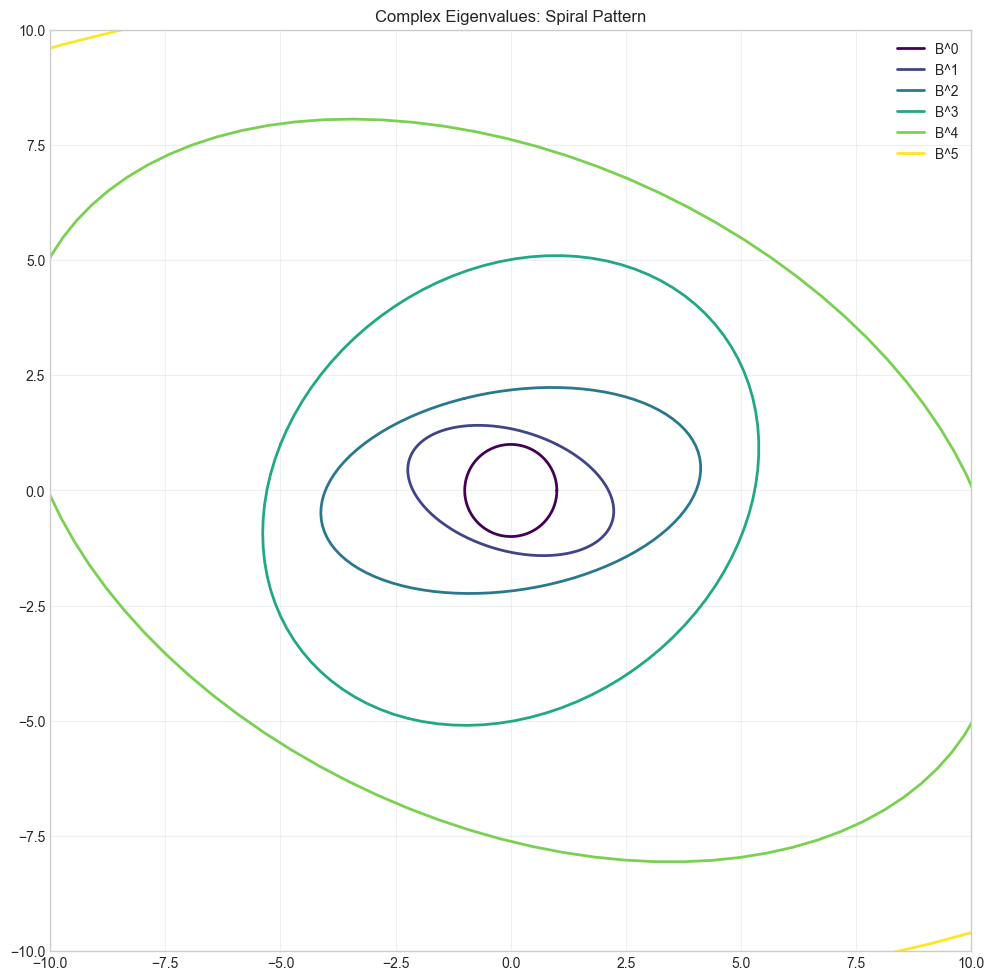


Scaling factor: 1.7321
Rotation angle: 54.74 degrees


In [3]:
# A matrix with complex eigenvalues
B = np.array([[1, -2],
              [1,  1]])

eigenvalues_B, eigenvectors_B = np.linalg.eig(B)

print(f"Matrix B:\n{B}\n")
print(f"Eigenvalues: {eigenvalues_B}")

# Visualize the transformation
fig, ax = plt.subplots(figsize=(10, 10))

# Original vectors
t = np.linspace(0, 2*np.pi, 100)
circle = np.vstack([np.cos(t), np.sin(t)])

# Apply transformation multiple times
colors = plt.cm.viridis(np.linspace(0, 1, 6))
current = circle.copy()

for i in range(6):
    ax.plot(current[0], current[1], color=colors[i],
            linewidth=2, label=f'B^{i}')
    current = B @ current

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title('Complex Eigenvalues: Spiral Pattern')

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/complex-eigenvalues-spiral.png', dpi=150, bbox_inches='tight')
plt.show()

# Compute magnitude and angle
lambda1 = eigenvalues_B[0]
magnitude = np.abs(lambda1)
angle = np.angle(lambda1) * 180 / np.pi

print(f"\nScaling factor: {magnitude:.4f}")
print(f"Rotation angle: {angle:.2f} degrees")

## Differential Equations Solution

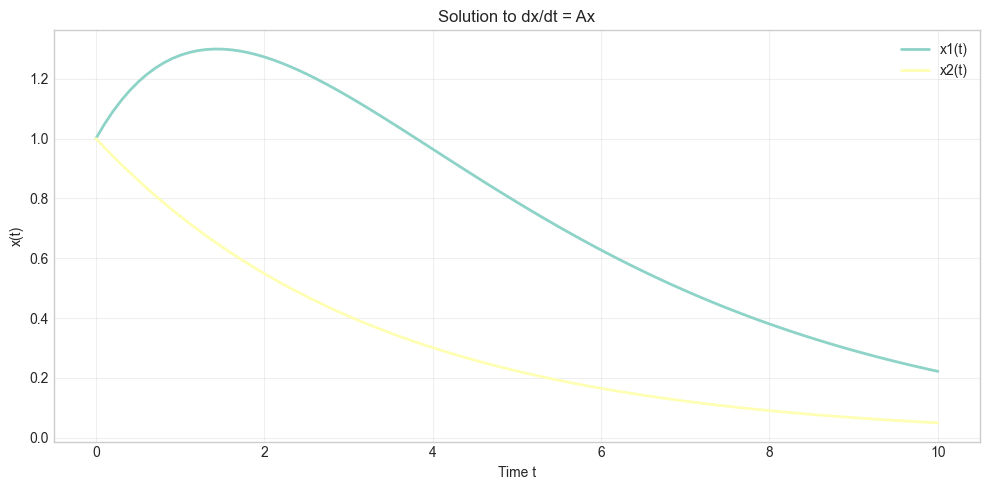

In [4]:
# Solve dx/dt = Ax
A = np.array([[-0.5, 1],
              [0, -0.3]])

x0 = np.array([1, 1])

# Compute solution at different times
t_values = np.linspace(0, 10, 100)
solutions = []

for t in t_values:
    x_t = expm(A * t) @ x0
    solutions.append(x_t)

solutions = np.array(solutions)

plt.figure(figsize=(10, 5))
plt.plot(t_values, solutions[:, 0], label='x1(t)', linewidth=2)
plt.plot(t_values, solutions[:, 1], label='x2(t)', linewidth=2)
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.title('Solution to dx/dt = Ax')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/diff-eq-solution.png', dpi=150, bbox_inches='tight')
plt.show()

## Fibonacci via Matrix Power

In [5]:
def fibonacci_matrix(n):
    """Compute nth Fibonacci number using matrix power."""
    F = np.array([[1, 1],
                  [1, 0]], dtype=np.float64)
    if n == 0:
        return 0
    result = np.linalg.matrix_power(F, n)
    return int(round(result[0, 1]))

# Compute Fibonacci numbers
print("Fibonacci sequence (first 15 numbers):")
for i in range(15):
    print(f"F({i}) = {fibonacci_matrix(i)}")

Fibonacci sequence (first 15 numbers):
F(0) = 0
F(1) = 1
F(2) = 1
F(3) = 2
F(4) = 3
F(5) = 5
F(6) = 8
F(7) = 13
F(8) = 21
F(9) = 34
F(10) = 55
F(11) = 89
F(12) = 144
F(13) = 233
F(14) = 377
